In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
from datetime import datetime
from pandas import DataFrame, Series
from datetime import datetime
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score




In [2]:
train_df = pd.read_csv('C:/Users/Kim Eun ho/Desktop/sooktat/프로젝트/train_merge_data.csv')
train_df.head()

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,locale,...,city,state,type_y,cluster,Year,Month,Weekend,Weekday,trend,NewYearsDay
0,0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Holiday,National,...,Quito,Pichincha,D,13,2013,1,0,1,0,True
1,1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Holiday,National,...,Quito,Pichincha,D,13,2013,1,0,1,0,True
2,2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Holiday,National,...,Quito,Pichincha,D,13,2013,1,0,1,0,True
3,3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Holiday,National,...,Quito,Pichincha,D,13,2013,1,0,1,0,True
4,4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Holiday,National,...,Quito,Pichincha,D,13,2013,1,0,1,0,True


In [3]:
test_df = pd.read_csv('C:/Users/Kim Eun ho/Desktop/sooktat/프로젝트/test_merge_data.csv')
test_df.head()

,Unnamed: 0,id,date,store_nbr,family,onpromotion,dcoilwtico,type_x,locale,locale_name,...,city,state,type_y,cluster,Year,Month,Weekend,Weekday,trend,NewYearsDay
0,0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8,Empty,Empty,Empty,...,Quito,Pichincha,D,13,2017,8,0,2,1688,False
1,1,3000889,2017-08-16,1,BABY CARE,0,46.8,Empty,Empty,Empty,...,Quito,Pichincha,D,13,2017,8,0,2,1688,False
2,2,3000890,2017-08-16,1,BEAUTY,2,46.8,Empty,Empty,Empty,...,Quito,Pichincha,D,13,2017,8,0,2,1688,False
3,3,3000891,2017-08-16,1,BEVERAGES,20,46.8,Empty,Empty,Empty,...,Quito,Pichincha,D,13,2017,8,0,2,1688,False
4,4,3000892,2017-08-16,1,BOOKS,0,46.8,Empty,Empty,Empty,...,Quito,Pichincha,D,13,2017,8,0,2,1688,False


In [4]:
train_df.isnull().sum()

Unnamed: 0      0
id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
dcoilwtico      0
type_x          0
locale          0
locale_name     0
description     0
transferred     0
transactions    0
city            0
state           0
type_y          0
cluster         0
Year            0
Month           0
Weekend         0
Weekday         0
trend           0
NewYearsDay     0
dtype: int64

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'store_nbr'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'onpromotion'}>,
        <AxesSubplot:title={'center':'dcoilwtico'}>,
        <AxesSubplot:title={'center':'transactions'}>,
        <AxesSubplot:title={'center':'cluster'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Weekend'}>,
        <AxesSubplot:title={'center':'Weekday'}>],
       [<AxesSubplot:title={'center':'trend'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

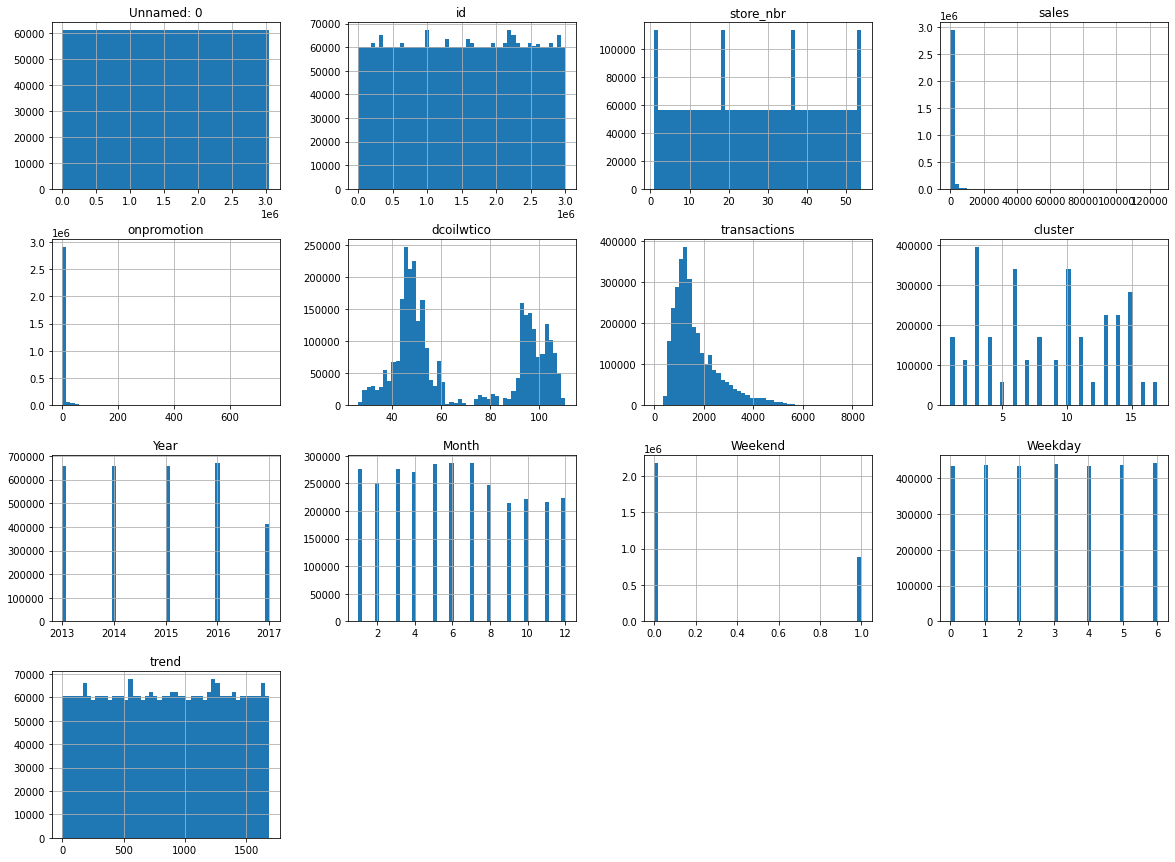

In [5]:
train_df.hist(bins=50, figsize=(20, 15))

In [6]:
print(train_df.info())
print(train_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 24 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   id            int64  
 2   date          object 
 3   store_nbr     int64  
 4   family        object 
 5   sales         float64
 6   onpromotion   int64  
 7   dcoilwtico    float64
 8   type_x        object 
 9   locale        object 
 10  locale_name   object 
 11  description   object 
 12  transferred   object 
 13  transactions  float64
 14  city          object 
 15  state         object 
 16  type_y        object 
 17  cluster       int64  
 18  Year          int64  
 19  Month         int64  
 20  Weekend       int64  
 21  Weekday       int64  
 22  trend         int64  
 23  NewYearsDay   bool   
dtypes: bool(1), float64(3), int64(10), object(10)
memory usage: 538.9+ MB
None
Index(['Unnamed: 0', 'id', 'date', 'store_nbr', 'family', 'sales',
       'onpromotion', 'dcoilwtico', 't

#### dcoilwtico,locale_name,description,city,state

In [7]:
train_df.drop(columns=['Unnamed: 0','locale_name','description','city','state'],inplace=True)
#Unnamed 불필요한 열
#locale_name description 명칭 등의 정보를 나타내므로 불필요
#city,state은 상점 정보와 cluster ,type등 다른 변수로 파악 가능하며 종류가 너무 다양함

In [8]:
test_df.drop(columns = ['Unnamed: 0','locale_name', 'description', 'state','city'], inplace = True)
test_df

,id,date,store_nbr,family,onpromotion,dcoilwtico,type_x,locale,transferred,transactions,type_y,cluster,Year,Month,Weekend,Weekday,trend,NewYearsDay
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.80,Empty,Empty,Empty,1448.259579,D,13,2017,8,0,2,1688,False
1,3000889,2017-08-16,1,BABY CARE,0,46.80,Empty,Empty,Empty,1448.259579,D,13,2017,8,0,2,1688,False
2,3000890,2017-08-16,1,BEAUTY,2,46.80,Empty,Empty,Empty,1448.259579,D,13,2017,8,0,2,1688,False
3,3000891,2017-08-16,1,BEVERAGES,20,46.80,Empty,Empty,Empty,1448.259579,D,13,2017,8,0,2,1688,False
4,3000892,2017-08-16,1,BOOKS,0,46.80,Empty,Empty,Empty,1448.259579,D,13,2017,8,0,2,1688,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,47.26,Empty,Empty,Empty,1986.976875,B,6,2017,8,0,3,1703,False
28508,3029396,2017-08-31,9,PREPARED FOODS,0,47.26,Empty,Empty,Empty,1986.976875,B,6,2017,8,0,3,1703,False
28509,3029397,2017-08-31,9,PRODUCE,1,47.26,Empty,Empty,Empty,1986.976875,B,6,2017,8,0,3,1703,False
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,47.26,Empty,Empty,Empty,1986.976875,B,6,2017,8,0,3,1703,False


#### family

In [9]:
train_df['family'].replace(['AUTOMOTIVE', 'HARDWARE', 'LAWN AND GARDEN', 'PLAYERS AND ELECTRONICS'], 'Tools', inplace = True)
train_df['family'].replace(['BEAUTY', 'LINGERIE', 'LADIESWEAR','PERSONAL CARE','CELEBRATION','MAGAZINES','BOOKS', 'BABY CARE'], 'LifeStyle', inplace = True)
train_df['family'].replace(['HOME APPLIANCES','HOME AND KITCHEN I', 'HOME AND KITCHEN II','HOME CARE','SCHOOL AND OFFICE SUPPLIES'], 'Home', inplace=True)
train_df['family'].replace([ 'GROCERY II', 'PET SUPPLIES','SEAFOOD','LIQUOR,WINE,BEER'], 'Food', inplace=True)
train_df['family'].replace(['DELI', 'EGGS'], 'Daily', inplace=True)

test_df['family'].replace(['AUTOMOTIVE', 'HARDWARE', 'LAWN AND GARDEN', 'PLAYERS AND ELECTRONICS'], 'Tools', inplace = True)
test_df['family'].replace(['BEAUTY', 'LINGERIE', 'LADIESWEAR','PERSONAL CARE','CELEBRATION','MAGAZINES','BOOKS', 'BABY CARE'], 'LifeStyle', inplace = True)
test_df['family'].replace(['HOME APPLIANCES','HOME AND KITCHEN I', 'HOME AND KITCHEN II','HOME CARE','SCHOOL AND OFFICE SUPPLIES'], 'Home', inplace=True)
test_df['family'].replace([ 'GROCERY II', 'PET SUPPLIES','SEAFOOD','LIQUOR,WINE,BEER'], 'Food', inplace=True)
test_df['family'].replace(['DELI', 'EGGS'], 'Daily', inplace=True)

print(train_df['family'].unique())

['Tools' 'LifeStyle' 'BEVERAGES' 'BREAD/BAKERY' 'CLEANING' 'DAIRY' 'Daily'
 'FROZEN FOODS' 'GROCERY I' 'Food' 'Home' 'MEATS' 'POULTRY'
 'PREPARED FOODS' 'PRODUCE']


In [10]:
train_df=pd.get_dummies(train_df,columns=['family'],drop_first=True)
test_df=pd.get_dummies(test_df,columns=['family'],drop_first=True)
train_df.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,type_x,locale,transferred,transactions,...,family_FROZEN FOODS,family_Food,family_GROCERY I,family_Home,family_LifeStyle,family_MEATS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_Tools
0,0,2013-01-01,1,0.0,0,93.14,Holiday,National,False,1420.876311,...,0,0,0,0,0,0,0,0,0,1
1,1,2013-01-01,1,0.0,0,93.14,Holiday,National,False,1420.876311,...,0,0,0,0,1,0,0,0,0,0
2,2,2013-01-01,1,0.0,0,93.14,Holiday,National,False,1420.876311,...,0,0,0,0,1,0,0,0,0,0
3,3,2013-01-01,1,0.0,0,93.14,Holiday,National,False,1420.876311,...,0,0,0,0,0,0,0,0,0,0
4,4,2013-01-01,1,0.0,0,93.14,Holiday,National,False,1420.876311,...,0,0,0,0,1,0,0,0,0,0


#### transferred,type_x,locale

In [11]:
train_df['transferred'].value_counts()

Empty    2551824
False     453718
False      32768
True       16038
Name: transferred, dtype: int64

In [12]:
#train_df['holiday'] = ["0" if s == True else "1" for s in train_df['transferred']]
#train_df.drop(columns=['transferred'],inplace=True)
train_df.drop(columns=['type_x','locale'],inplace=True)
#type_x,locale 을 drop시키고 transferred가 true인 날만 평일로 구분하여 휴일과 평일 구분하려 했지만 transferred가 이상함
test_df.drop(columns=['type_x','locale'],inplace=True)

In [13]:
train_df['transferred'].replace(['True'], 0, inplace=True)
train_df['transferred'].replace(['False',False], 1, inplace=True)
train_df['transferred'].replace(['Empty'], 2, inplace=True)
train_df=train_df.rename(columns={'transferred':'holiday'})

In [14]:
test_df['transferred'].replace(['True'], 0, inplace=True)
test_df['transferred'].replace(['False',False], 1, inplace=True)
test_df['transferred'].replace(['Empty'], 2, inplace=True)
test_df=test_df.rename(columns={'transferred':'holiday'})

#### type_y

In [15]:
train_df=pd.get_dummies(train_df,columns=['type_y'],drop_first=True)
test_df=pd.get_dummies(test_df,columns=['type_y'],drop_first=True)
train_df.head()
#A,B,C,D,E 가변수 변환

,id,date,store_nbr,sales,onpromotion,dcoilwtico,holiday,transactions,cluster,Year,...,family_LifeStyle,family_MEATS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_Tools,type_y_B,type_y_C,type_y_D,type_y_E
0,0,2013-01-01,1,0.0,0,93.14,1,1420.876311,13,2013,...,0,0,0,0,0,1,0,0,1,0
1,1,2013-01-01,1,0.0,0,93.14,1,1420.876311,13,2013,...,1,0,0,0,0,0,0,0,1,0
2,2,2013-01-01,1,0.0,0,93.14,1,1420.876311,13,2013,...,1,0,0,0,0,0,0,0,1,0
3,3,2013-01-01,1,0.0,0,93.14,1,1420.876311,13,2013,...,0,0,0,0,0,0,0,0,1,0
4,4,2013-01-01,1,0.0,0,93.14,1,1420.876311,13,2013,...,1,0,0,0,0,0,0,0,1,0


In [16]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 33 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     int64  
 1   date                   object 
 2   store_nbr              int64  
 3   sales                  float64
 4   onpromotion            int64  
 5   dcoilwtico             float64
 6   holiday                int64  
 7   transactions           float64
 8   cluster                int64  
 9   Year                   int64  
 10  Month                  int64  
 11  Weekend                int64  
 12  Weekday                int64  
 13  trend                  int64  
 14  NewYearsDay            bool   
 15  family_BREAD/BAKERY    uint8  
 16  family_CLEANING        uint8  
 17  family_DAIRY           uint8  
 18  family_Daily           uint8  
 19  family_FROZEN FOODS    uint8  
 20  family_Food            uint8  
 21  family_GROCERY I       uint8  
 22  family_Home       

#### transaction,dcoilwtico

In [17]:
trans_df=train_df[['transactions','dcoilwtico']]

trans2_df=test_df[['transactions','dcoilwtico']]


In [18]:
minmax_scaler=MinMaxScaler()
minmax_scaled=minmax_scaler.fit_transform(trans_df)

minmax_scaled2=minmax_scaler.fit_transform(trans2_df)

In [19]:
round(pd.DataFrame(minmax_scaled),2)

,0,1
0,0.17,0.79
1,0.17,0.79
2,0.17,0.79
3,0.17,0.79
4,0.17,0.79
...,...,...
3054343,0.26,0.25
3054344,0.26,0.25
3054345,0.26,0.25
3054346,0.26,0.25


In [20]:
trans_df=round(pd.DataFrame(minmax_scaled),2).loc[:,0]
trans2_df=round(pd.DataFrame(minmax_scaled2),2).loc[:,0]

oil_df=round(pd.DataFrame(minmax_scaled),2).loc[:,1]
oil2_df=round(pd.DataFrame(minmax_scaled2),2).loc[:,0]


In [21]:

train_df['transactions']=trans_df
train_df['oil_price']=oil_df

test_df['transactions']=trans2_df
test_df['oil_price']=oil2_df

In [22]:
train_df.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,holiday,transactions,cluster,Year,...,family_MEATS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_Tools,type_y_B,type_y_C,type_y_D,type_y_E,oil_price
0,0,2013-01-01,1,0.0,0,93.14,1,0.17,13,2013,...,0,0,0,0,1,0,0,1,0,0.79
1,1,2013-01-01,1,0.0,0,93.14,1,0.17,13,2013,...,0,0,0,0,0,0,0,1,0,0.79
2,2,2013-01-01,1,0.0,0,93.14,1,0.17,13,2013,...,0,0,0,0,0,0,0,1,0,0.79
3,3,2013-01-01,1,0.0,0,93.14,1,0.17,13,2013,...,0,0,0,0,0,0,0,1,0,0.79
4,4,2013-01-01,1,0.0,0,93.14,1,0.17,13,2013,...,0,0,0,0,0,0,0,1,0,0.79


### Modelling

Linear regression

In [23]:
train_df.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,holiday,transactions,cluster,Year,...,family_MEATS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_Tools,type_y_B,type_y_C,type_y_D,type_y_E,oil_price
0,0,2013-01-01,1,0.0,0,93.14,1,0.17,13,2013,...,0,0,0,0,1,0,0,1,0,0.79
1,1,2013-01-01,1,0.0,0,93.14,1,0.17,13,2013,...,0,0,0,0,0,0,0,1,0,0.79
2,2,2013-01-01,1,0.0,0,93.14,1,0.17,13,2013,...,0,0,0,0,0,0,0,1,0,0.79
3,3,2013-01-01,1,0.0,0,93.14,1,0.17,13,2013,...,0,0,0,0,0,0,0,1,0,0.79
4,4,2013-01-01,1,0.0,0,93.14,1,0.17,13,2013,...,0,0,0,0,0,0,0,1,0,0.79


In [24]:
train_df.columns

Index(['id', 'date', 'store_nbr', 'sales', 'onpromotion', 'dcoilwtico',
       'holiday', 'transactions', 'cluster', 'Year', 'Month', 'Weekend',
       'Weekday', 'trend', 'NewYearsDay', 'family_BREAD/BAKERY',
       'family_CLEANING', 'family_DAIRY', 'family_Daily',
       'family_FROZEN FOODS', 'family_Food', 'family_GROCERY I', 'family_Home',
       'family_LifeStyle', 'family_MEATS', 'family_POULTRY',
       'family_PREPARED FOODS', 'family_PRODUCE', 'family_Tools', 'type_y_B',
       'type_y_C', 'type_y_D', 'type_y_E', 'oil_price'],
      dtype='object')

In [25]:
train_df=train_df.drop(['id','NewYearsDay'],axis=1)
test_df=test_df.drop(['id','NewYearsDay'],axis=1)


In [26]:
train_df=pd.get_dummies(train_df,columns=['cluster','store_nbr',],drop_first=True)
test_df=pd.get_dummies(test_df,columns=['cluster','store_nbr',],drop_first=True)

In [27]:
from sklearn import preprocessing
x = train_df[['onpromotion','trend']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [28]:
x2= test_df[['onpromotion','trend']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled2 = min_max_scaler.fit_transform(x2)
df2 = pd.DataFrame(x_scaled2)

In [29]:
df
onpromtion_df=round(pd.DataFrame(df),2).loc[:,0]
trend_df=round(pd.DataFrame(df),2).loc[:,1]

In [30]:
df2
onpromtion2_df=round(pd.DataFrame(df2),2).loc[:,0]
trend2_df=round(pd.DataFrame(df2),2).loc[:,1]

In [31]:
train_df.drop(columns=['onpromotion','trend'],inplace=True)
train_df['onpromotion']=onpromtion_df
train_df['trend']=trend_df

In [32]:
test_df.drop(columns=['onpromotion','trend'],inplace=True)
test_df['onpromotion']=onpromtion2_df
test_df['trend']=trend2_df

In [33]:
train_df

,date,sales,dcoilwtico,holiday,transactions,Year,Month,Weekend,Weekday,family_BREAD/BAKERY,...,store_nbr_47,store_nbr_48,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54,onpromotion,trend
0,2013-01-01,0.000,93.14,1,0.17,2013,1,0,1,0,...,0,0,0,0,0,0,0,0,0.00,0.0
1,2013-01-01,0.000,93.14,1,0.17,2013,1,0,1,0,...,0,0,0,0,0,0,0,0,0.00,0.0
2,2013-01-01,0.000,93.14,1,0.17,2013,1,0,1,0,...,0,0,0,0,0,0,0,0,0.00,0.0
3,2013-01-01,0.000,93.14,1,0.17,2013,1,0,1,0,...,0,0,0,0,0,0,0,0,0.00,0.0
4,2013-01-01,0.000,93.14,1,0.17,2013,1,0,1,0,...,0,0,0,0,0,0,0,0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,438.133,47.57,1,0.26,2017,8,0,1,0,...,0,0,0,0,0,0,0,0,0.00,1.0
3054344,2017-08-15,154.553,47.57,1,0.26,2017,8,0,1,0,...,0,0,0,0,0,0,0,0,0.00,1.0
3054345,2017-08-15,2419.729,47.57,1,0.26,2017,8,0,1,0,...,0,0,0,0,0,0,0,0,0.20,1.0
3054346,2017-08-15,121.000,47.57,1,0.26,2017,8,0,1,0,...,0,0,0,0,0,0,0,0,0.01,1.0


In [54]:
train_df.columns

Index(['sales', 'dcoilwtico', 'holiday', 'transactions', 'Year', 'Month',
       'Weekend', 'Weekday', 'family_BREAD/BAKERY', 'family_CLEANING',
       'family_DAIRY', 'family_Daily', 'family_FROZEN FOODS', 'family_Food',
       'family_GROCERY I', 'family_Home', 'family_LifeStyle', 'family_MEATS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_Tools', 'type_y_B', 'type_y_C', 'type_y_D', 'type_y_E',
       'oil_price', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5',
       'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9', 'cluster_10',
       'cluster_11', 'cluster_12', 'cluster_13', 'cluster_14', 'cluster_15',
       'cluster_16', 'cluster_17', 'store_nbr_2', 'store_nbr_3', 'store_nbr_4',
       'store_nbr_5', 'store_nbr_6', 'store_nbr_7', 'store_nbr_8',
       'store_nbr_9', 'store_nbr_10', 'store_nbr_11', 'store_nbr_12',
       'store_nbr_13', 'store_nbr_14', 'store_nbr_15', 'store_nbr_16',
       'store_nbr_17', 'store_nbr_18', 'store_nbr_1

In [34]:
train_data=train_df
test_data=test_df


In [35]:
sub_train_data = train_df[train_df.date <= '2016-07-31']
valid_data = train_df[train_df.date >= '2016-08-01']

In [36]:

print(train_data.shape)
print(sub_train_data.shape)
print(valid_data.shape)
print(test_data.shape)

(3054348, 99)
(2368278, 99)
(686070, 99)
(28512, 98)


In [37]:
# 검증 과정에서 사용할 데이터
sub_train_data.drop(columns = ['date'], inplace = True)
valid_data.drop(columns = ['date'], inplace = True)
# 최종 모델 훈련에서 사용할 데이터
train_data.drop(columns = ['date'], inplace = True)
test_data.drop(columns = ['date'], inplace = True)

In [38]:
X_sub_train_data = sub_train_data.drop(columns = ['sales'])
y_sub_train_data = sub_train_data['sales']

X_valid_data = valid_data.drop(columns = ['sales'])
y_valid_data = valid_data['sales']

#X_train_data = train_data.drop(columns = ['sales'])
#y_train_data = train_data['sales']

In [39]:
X_sub_train_data

,dcoilwtico,holiday,transactions,Year,Month,Weekend,Weekday,family_BREAD/BAKERY,family_CLEANING,family_DAIRY,...,store_nbr_47,store_nbr_48,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54,onpromotion,trend
0,93.140000,1,0.17,2013,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.00
1,93.140000,1,0.17,2013,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.00
2,93.140000,1,0.17,2013,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.00
3,93.140000,1,0.17,2013,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.00
4,93.140000,1,0.17,2013,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368273,40.546667,2,0.25,2016,7,1,6,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.77
2368274,40.546667,2,0.25,2016,7,1,6,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.77
2368275,40.546667,2,0.25,2016,7,1,6,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.77
2368276,40.546667,2,0.25,2016,7,1,6,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.77


In [40]:
# modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
model = LinearRegression()
model.fit(X_sub_train_data, y_sub_train_data)
train_pred = model.predict(X_sub_train_data)
train_pred[train_pred < 0] = 0
mean_squared_log_error(y_sub_train_data, train_pred)

6.714475621873762

In [41]:
valid_pred = model.predict(X_valid_data)
valid_pred[valid_pred < 0] = 0
mean_squared_log_error(y_valid_data, valid_pred)

6.026536947757945

Randomforest Regression

In [42]:
from sklearn.ensemble import RandomForestRegressor
from joblib import Parallel, delayed
import warnings
from sklearn.linear_model import Ridge

In [43]:
rfmodel = RandomForestRegressor(min_samples_split = 10)
rfmodel.fit(X_sub_train_data[-10000:], y_sub_train_data[-10000:])

RandomForestRegressor(min_samples_split=10)

In [44]:
valid_pred = rfmodel.predict(X_valid_data)

In [45]:
valid_pred[valid_pred < 0] = 0
mean_squared_log_error(y_valid_data, valid_pred)

2.1615590698331566

Test data

In [46]:
X_train_data = train_data.drop(columns = ['sales'])
y_train_data = train_data['sales']


In [47]:
rfmodel = RandomForestRegressor(min_samples_split = 10)
rfmodel.fit(X_train_data[-10000:], y_train_data[-10000:])

RandomForestRegressor(min_samples_split=10)

In [48]:
test_data.head()

,dcoilwtico,holiday,transactions,Year,Month,Weekend,Weekday,family_BREAD/BAKERY,family_CLEANING,family_DAIRY,...,store_nbr_47,store_nbr_48,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54,onpromotion,trend
0,46.8,2,0.23,2017,8,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0.00,0.0
1,46.8,2,0.23,2017,8,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0.00,0.0
2,46.8,2,0.23,2017,8,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0.00,0.0
3,46.8,2,0.23,2017,8,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0.03,0.0
4,46.8,2,0.23,2017,8,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0.00,0.0


In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 97 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dcoilwtico             28512 non-null  float64
 1   holiday                28512 non-null  int64  
 2   transactions           28512 non-null  float64
 3   Year                   28512 non-null  int64  
 4   Month                  28512 non-null  int64  
 5   Weekend                28512 non-null  int64  
 6   Weekday                28512 non-null  int64  
 7   family_BREAD/BAKERY    28512 non-null  uint8  
 8   family_CLEANING        28512 non-null  uint8  
 9   family_DAIRY           28512 non-null  uint8  
 10  family_Daily           28512 non-null  uint8  
 11  family_FROZEN FOODS    28512 non-null  uint8  
 12  family_Food            28512 non-null  uint8  
 13  family_GROCERY I       28512 non-null  uint8  
 14  family_Home            28512 non-null  uint8  
 15  fa

In [50]:
test_pred = rfmodel.predict(test_data)
test_pred[test_pred < 0] = 0
                          


In [51]:
submission = pd.read_csv('C:/Users/Kim Eun ho/Desktop/sooktat/프로젝트/sample_submission.csv')

In [52]:
submission['sales'] = test_pred

In [53]:
submission.to_csv('submission.csv', index = False)